In [13]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

In [14]:
df = pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [15]:
df.shape

(10000, 2)

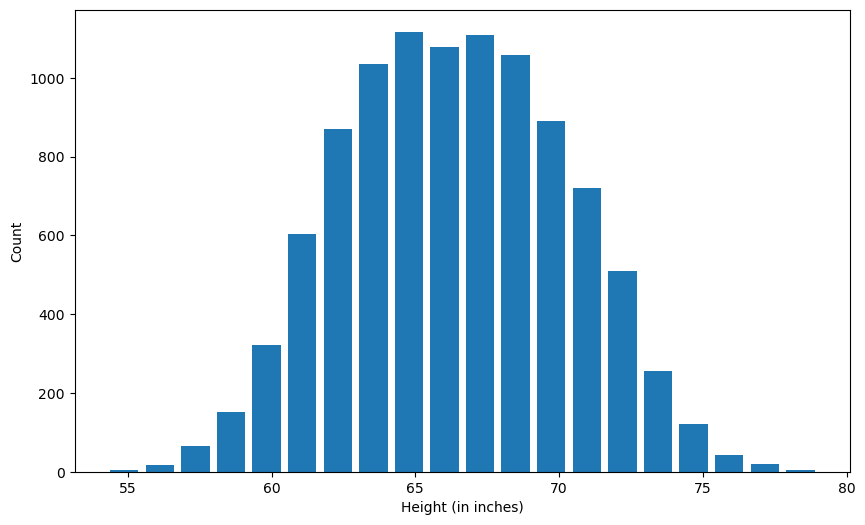

In [16]:
plt.hist(df.height, bins = 20, rwidth = 0.8)
plt.xlabel('Height (in inches)')
plt.ylabel('Count')
plt.show()

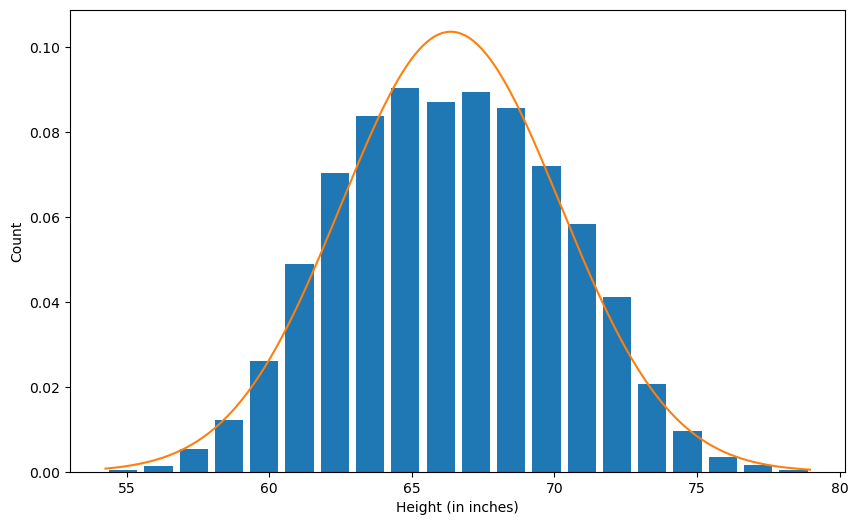

In [17]:
from scipy.stats import norm
import numpy as np

plt.hist(df.height, bins = 20, rwidth = 0.8, density= True)
plt.xlabel('Height (in inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

In [18]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [19]:
# 3 standard deviation method to remove the outliers

upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [20]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [21]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [22]:
df_no_outlier = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [23]:
df.shape[0] - df_no_outlier.shape[0]

7

$$\frac{X - \mu}{\sigma}$$


In [25]:
df['zscore'] = (df.height - df.height.mean())/df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [26]:
(73.847017-66.37)/3.84

1.9471398437499974

In [27]:
df_no_outlier = df[(df['zscore']>3) | (df['zscore']<-3)]

In [28]:
df.shape[0] - df_no_outlier.shape[0]

9993